### Import Libraries

In [ ]:
import pandas as pd
import pathlib
import seaborn as sns

import sys
sys.path.append("../utils")
from validate_utils import create_classification_profiles

### Load Cell Health Profile Labels

In [ ]:
cell_health_hash = "30ea5de393eb9cfc10b575582aa9f0f857b44c59"
cell_health_labels_link = f"https://raw.github.com/broadinstitute/cell-health/{cell_health_hash}/1.generate-profiles/data/consensus/cell_health_median.tsv.gz"

cell_health_labels = pd.read_csv(cell_health_labels_link, compression="gzip", sep="\t")
cell_health_labels

### Create Classification Profiles

In [ ]:
cell_health_data_hash = "4ee08b16f4b5c5266309a295b0a1697f0b9540b8"
plate_classifications_dir_link = f"https://github.com/WayScience/cell-health-data/raw/{cell_health_data_hash}/4.classify-features/plate_classifications"
plate_names = ["SQ00014610", "SQ00014611", "SQ00014612", "SQ00014613", "SQ00014614", "SQ00014615", "SQ00014616", "SQ00014617", "SQ00014618"]

cell_line_plates = {
    "A549": ["SQ00014610", "SQ00014611", "SQ00014612"],
    "ES2": ["SQ00014613", "SQ00014614", "SQ00014615"],
    "HCC44": ["SQ00014616", "SQ00014617", "SQ00014618"],
}

classification_profiles = create_classification_profiles(plate_classifications_dir_link, cell_line_plates)
classification_profiles

### Find/Graph Correlation

<AxesSubplot:>

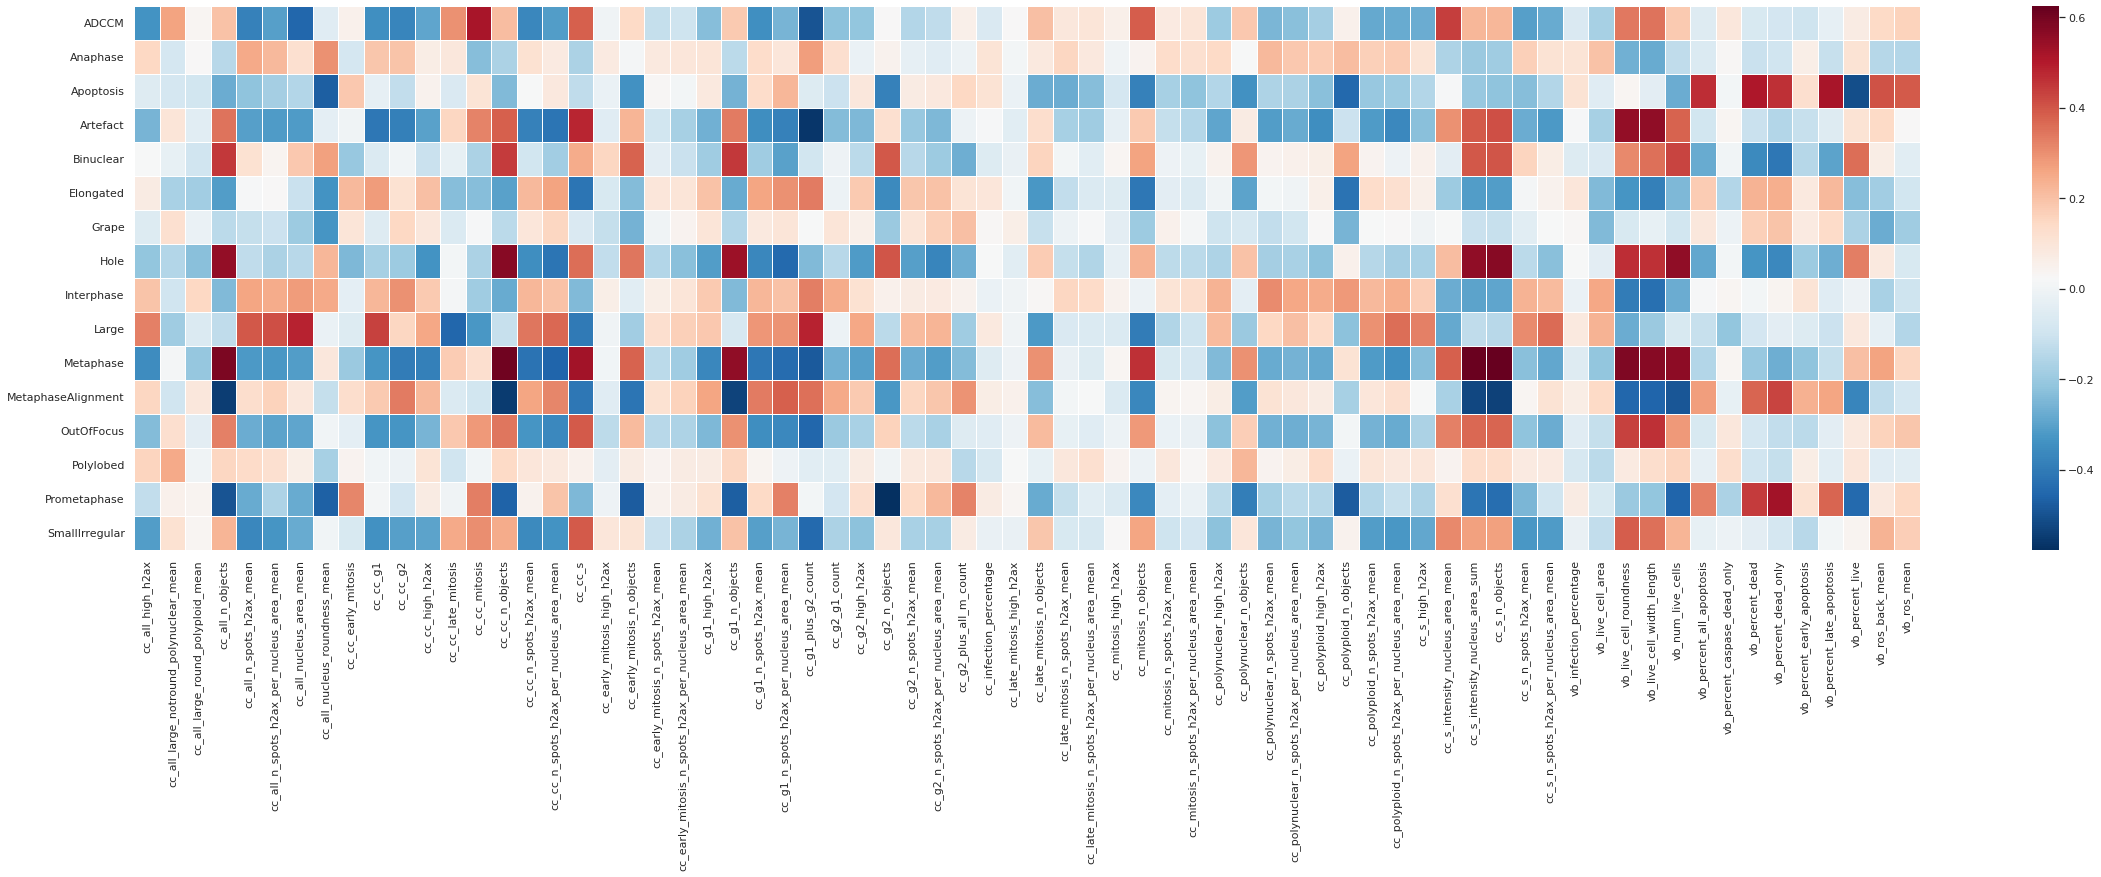

In [24]:
# combine cell health label profiles and classification profiles on perturbation and cell line
final_profile_dataframe = pd.merge(cell_health_labels, classification_profiles, on=["Metadata_pert_name", "Metadata_cell_line"])
# find correlation
corr = final_profile_dataframe.corr(method="pearson")
# convert spearman correlation to diagram-friendly format
corr_graph = corr.iloc[70:, :70]

sns.set(rc={'figure.figsize':(40,10)})
sns.heatmap(corr_graph, 
            xticklabels=corr_graph.columns,
            yticklabels=corr_graph.index,
            cmap='RdBu_r',
            linewidth=0.5)

### Show Correlation with Clustermap

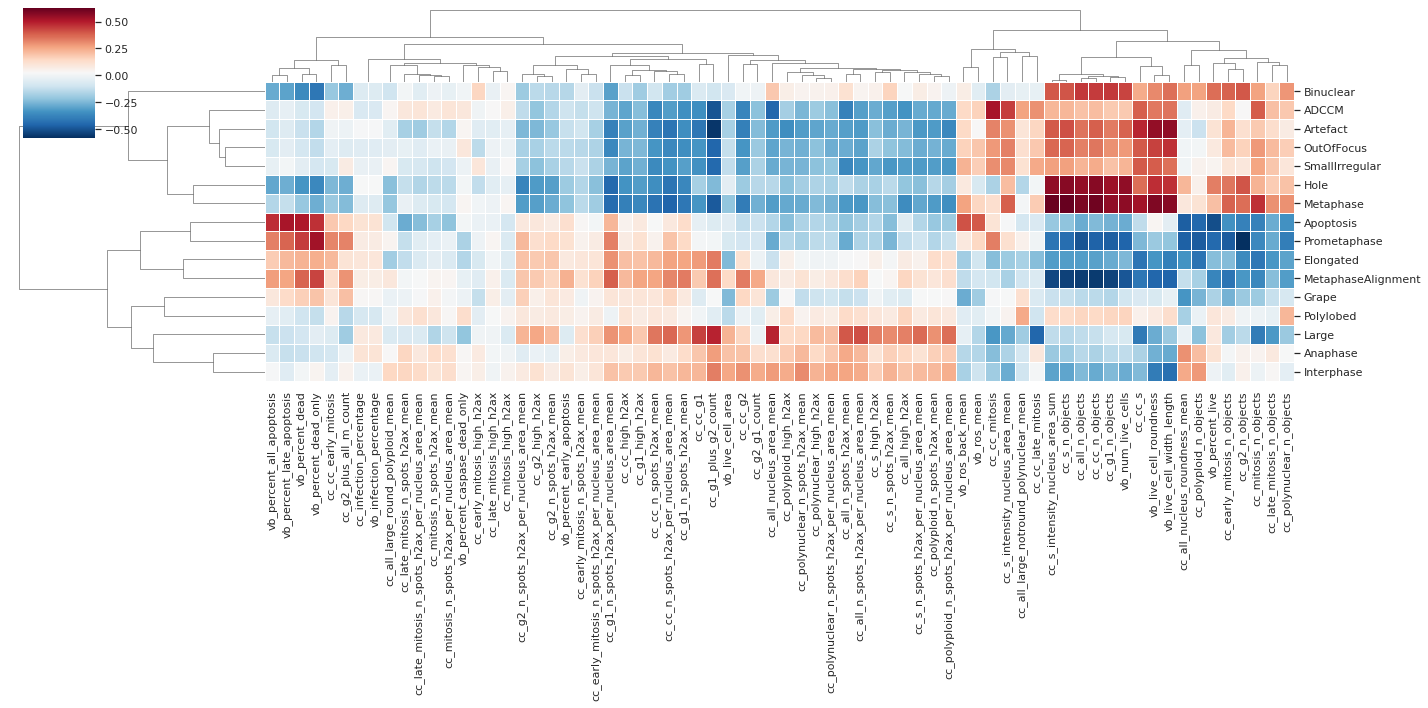

In [25]:
sns.clustermap(corr_graph, 
            xticklabels=corr_graph.columns,
            yticklabels=corr_graph.index,
            cmap='RdBu_r',
            linewidth=0.5,
            figsize=(20,10))